velocity dispersion
----

$\sigma_i^2=\left\langle(v_i-\langle v_i\rangle)^2\right\rangle=\left\langle v_i^2-\langle v_i\rangle^2\right\rangle$
2ter Term entspricht np.std()^2

velocities in polar coordinates
---

$\vec{v}=\dot{\vec{r}}=\dot{r}\vec{e}_r+r\dot{\phi}\vec{e}_\phi$

radial component: $\vec{v}_R=\dot{r}\vec{e}_r$

tangential component: $\vec{v}_T=r\dot{\phi}\vec{e}_\phi$

$\vec{e}_r=\left(\begin{array}{c}\cos{\phi}\\\sin{\phi}\end{array}\right)$  ;  $\vec{e}_\phi=\left(\begin{array}{c}-\sin{\phi}\\\cos{\phi}\end{array}\right)$

with: $r=\sqrt{x^2+y^2}$,  $\cos{\phi}=\frac{x}{r}$  and  $\sin{\phi}=\frac{y}{r}$

and: $\dot{r}=\frac{xv_x+yv_y}{\sqrt{x^2+y^2}}$ and $\dot{\phi}=\dot{\arctan{\frac{y}{x}}}=\frac{xv_y-yv_x}{x^2+y^2}$

$\rightarrow  \vec{v}_R=\frac{xv_x+yv_y}{x^2+y^2}\left(\begin{array}{c}x\\y\end{array}\right)$
$\Rightarrow  |v_R|=\frac{xv_x+yv_y}{\sqrt{x^2+y^2}}$

$\rightarrow  \vec{v}_T=\frac{xv_y-yv_x}{x^2+y^2}\left(\begin{array}{c}-y\\x\end{array}\right)$
$\Rightarrow  |v_T|=\frac{xv_y-yv_x}{\sqrt{x^2+y^2}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Daten einlesen
r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
# 'C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat'

In [3]:
r_2d=np.sqrt(x**2+y**2)
rsort2d=np.sort(r_2d)
rest2d=r_2d-rsort2d
print(np.sum(rest2d), "r_2d is not sorted; has to be sorted")
#r_2d is not sorted; has to be sorted 

(-9.276845958083868e-11, 'r_2d is not sorted; has to be sorted')


In [4]:
#bin parameter
stars=len(r_2d)
bin_num=50
spb=stars/bin_num+1

#sort r_2d by distance 
r2dsort=np.sort(r_2d)

#sort distances and velocities by index of sorted r_2d
r_2dsortindex=np.argsort(r_2d) #array shows the original indices 
xsort=x[r_2dsortindex] #elements sorted like r_2d was sorted
ysort=y[r_2dsortindex]
vxsort=vx[r_2dsortindex] 
vysort=vy[r_2dsortindex]

#define and initialize radial and tangential velocity
vR=np.zeros(stars)
vT=np.zeros(stars)

#distance
R=np.zeros(bin_num)

#velocity dispersions
sigrad2d=np.zeros(bin_num)
sigtan2d=np.zeros(bin_num)

#mean velocities
meanrad2d=np.zeros(bin_num)
meantan2d=np.zeros(bin_num)

In [5]:
vR=(xsort*vxsort+ysort*vysort)/r2dsort
vT=(xsort*vysort-ysort*vxsort)/r2dsort

In [6]:
for n in range(bin_num):
    R[n]=np.mean(r2dsort[n*spb:(n+1)*spb])
    sigrad2d[n]=np.std(vR[n*spb:(n+1)*spb])
    sigtan2d[n]=np.std(vT[n*spb:(n+1)*spb])
    meanrad2d[n]=np.mean(vR[n*spb:(n+1)*spb])
    meantan2d[n]=np.mean(vT[n*spb:(n+1)*spb])

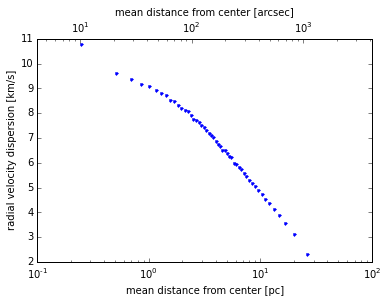

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.semilogx(R,sigrad2d,'.')
#ax1.errorbar(R,sigtheta_r3d,sigthetaerr,fmt='.')
ax1.set_xlim(0.1,100)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('radial velocity dispersion [km/s]')

ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')

plt.show()
fig.savefig('Plots/2d radial velocity dispersion with '+str(bin_num)+' steps')

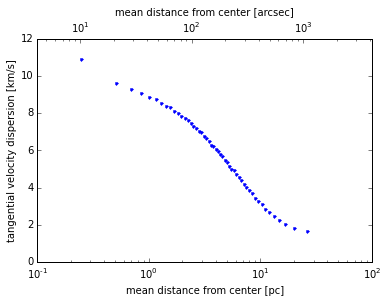

In [8]:
#plt.title('projected tangential velocity dispersion with '+str(bin_num)+' steps')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.semilogx(R,sigtan2d,'.')
#ax1.errorbar(R,sigtheta_r3d,sigthetaerr,fmt='.')
ax1.set_xlim(0.1,100)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('tangential velocity dispersion [km/s]')

ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')

plt.show()
fig.savefig('Plots/2d tangential velocity dispersion with '+str(bin_num)+' steps')

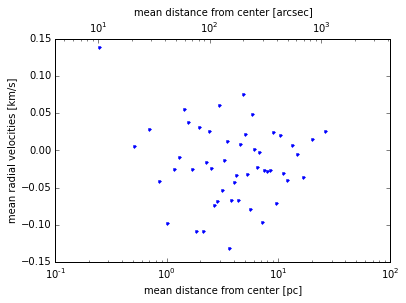

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.semilogx(R,meanrad2d,'.')
#ax1.errorbar(R,sigtheta_r3d,sigthetaerr,fmt='.')
ax1.set_xlim(0.1,100)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('mean radial velocities [km/s]')

ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')

plt.show()
fig.savefig('Plots/2d mean radial velocities')

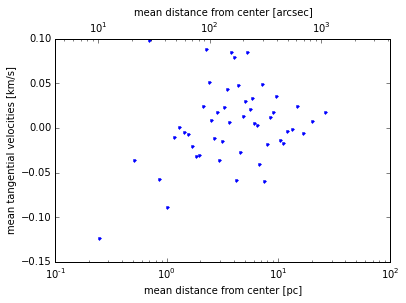

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.semilogx(R,meantan2d,'.')
#ax1.errorbar(R,sigtheta_r3d,sigthetaerr,fmt='.')
ax1.set_xlim(0.1,100)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('mean tangential velocities [km/s]')

ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')

plt.show()
fig.savefig('Plots/2d mean tangential velocities')

still to do
--

- anisotropy parameter too?
- 